# Lab 13 | Linear Regression

In [9]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## 1. Preview of Admissions Data Set
### a. First 5 rows of data

In [11]:
adm = pd.read_csv('admissions.csv')
adm.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### b. Description of data

In [12]:
adm.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### c. Info about data

In [13]:
adm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


## 2. Generate Train and Test data

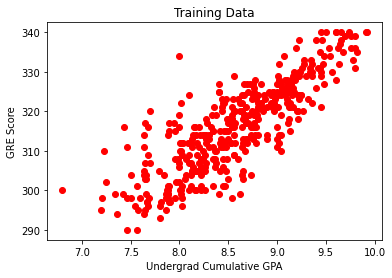

In [20]:
# Set the X and Y
X = adm["CGPA"].values.reshape(-1, 1)
y = adm["GRE Score"].values

# Assign train an test
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2, random_state=100)

#. Generate scatterplot
plt.scatter(x_train, y_train, color='red')
plt.xlabel('Undergrad Cumulative GPA')
plt.ylabel('GRE Score')
plt.title('Training Data')
plt.show()

## 3. Fit Training Data to Regression Model

In [21]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_predict = lm.predict(x_test)
train_score = round(lm.score(x_train, y_train) * 100, 2)
test_score = round(lm.score(x_test, y_test) * 100, 2)
print(f'Train Accuracy {train_score}%')
print(f'Test Accuracy {test_score}%')

Train Accuracy 69.14%
Test Accuracy 62.53%


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

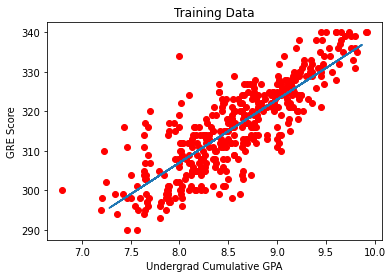

In [23]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_test, y_predict)
plt.xlabel('Undergrad Cumulative GPA')
plt.ylabel('GRE Score')
plt.title('Training Data')
plt.plot

## 4. Observations

- Undergrad culumative GPA is a decent predictor for GRE test scores
- A few obvious outliers scored higher on their GRE than would be predicted
- Other factors may be better predictors (perhaphs GRE study time)